# Nearest-Neighbor Classification

In [2]:
import pandas as pd
df = pd.DataFrame([
    [  1 ,   7 ,  1 ,   1 ,  "spo" ],
    [  2 ,  13 ,  0 ,   1 ,  "spo" ],
    [  3 ,   8 ,  2 ,   1 ,  "spo" ],
    [  4 ,   7 ,  2 ,   3 ,  "spo" ],
    [  5 ,   2 ,  1 ,   0 ,  "sci" ],
    [  6 ,   1 ,  0 ,   1 ,  "sci" ],
    [  7 ,   2 ,  2 ,   1 ,  "sci" ],
    [  8 ,  12 ,  8 ,  11 ,  "his" ],
    [  9 ,   7 ,  3 ,   5 ,  "his" ],
    [ 10 ,   6 ,  5 ,   8 ,  "his" ]],
    columns=[  "DocId" ,  "$X_p$" ,  "$X_l$" ,  "$X_d$" ,  "$Y$" ])

You are given a collection of text documents that each have been classified according to their content into the three classes
*sports*, *scientific*, and *historical*.

Furthermore, three integer features $(X_p, X_l, X_d)$ have been obtained for each document,
by detecting named entities and tagging each entity as *person*, *location*, or *date*,
and counting the number of times each kind of entity occurs.

For each training document, you know $X_p, X_l, X_d$ and the class label $Y = \{\text{spo}, \text{sci}, \text{his}\}$:

In [3]:
df

,DocId,$X_p$,$X_l$,$X_d$,$Y$
0,1,7,1,1,spo
1,2,13,0,1,spo
2,3,8,2,1,spo
3,4,7,2,3,spo
4,5,2,1,0,sci
5,6,1,0,1,sci
6,7,2,2,1,sci
7,8,12,8,11,his
8,9,7,3,5,his
9,10,6,5,8,his


a) Compute the most likely class for $x=(5,4,3)$ using the $k$-nearest neighbor classifier with $k=3$ and show how you arrived at your solution.
Use the Euclidean distance function and majority voting.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = df.iloc[:,1:4].values
y = df.iloc[:,4].values

print(X)
print(y)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print("prediction:", neigh.predict([[5,4,3]]))

[[ 7  1  1]
 [13  0  1]
 [ 8  2  1]
 [ 7  2  3]
 [ 2  1  0]
 [ 1  0  1]
 [ 2  2  1]
 [12  8 11]
 [ 7  3  5]
 [ 6  5  8]]
['spo' 'spo' 'spo' 'spo' 'sci' 'sci' 'sci' 'his' 'his' 'his']
spo
prediction: ['spo']


b) Reduce the data set to the mean vectors of each class only.
Compute the most likely class for $x$ using the nearest-neighbor classifier on this reduced data set
and show how you arrived at your solution. Use the Euclidean distance function.

In [4]:
#print(X[0:3])
#print(np.mean(X[0:3], axis=0))
newX = np.array([np.mean(X[0:3], axis=0), np.mean(X[4:6], axis=0), np.mean(X[7:9], axis=0)])
newy = np.array(["spo", "sci", "his"])

#print(newX)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(newX, newy) 

print("prediction:", neigh.predict([[5,4,3]]))

prediction: ['sci']


Briefly discuss why the results of the $k$-nearest neighbor classifier could be different from
the results obtained by using the nearest-mean classifier from the previous part.

Beim k-nearest neighbor ist der Testpunkt am nächsten zu zwei Punkten der Klasse "spo". Bei nearest-mean am nächsten zum Mittelwert von "sci".

# Probabilistic Tic-Tac-Toe

In this exercise we will train a probabilistic model to play Tic-Tac-Toe with us. To do so, download the UCI Tic-Tac-Toe dataset (https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame).

a) Load the data and make yourself familiar with the data representation. Write code to display a field in your shell using ASCII characters. Write a function `chose_cell` that given the data and using Bayes' Theorem, returns the best cell (as number from 0 to 8) for the first turn of player $X$?

In [5]:
import pandas as pd
df = pd.read_csv('tic-tac-toe.data')

def display_field(field):
    # TODO
    for i in [0,3,6]:
        print(field[i],field[i+1],field[i+2])
    

def chose_cell(df):
    # TODO
    xPositive=np.zeros(9)
    count_p=0
    X = np.array(df.iloc[:,:-1].values)
    Y = np.array(df.iloc[:,-1:].values)
    for i in range(len(Y)):
        if Y[i] == "positive":
            count_p += 1
            for j in range(len(X[0])):
                if X[i][j] == 'x':
                    xPositive[j] += 1
    xPositive=[x/count_p for x in xPositive]
    return(xPositive.index(max(xPositive)))

print(chose_cell(df))
test_field = ['b' for i in range(9)]
test_field[chose_cell(df)] = 'x'
display_field(test_field)

4
b b b
b x b
b b b


b) Adapt your function `chose_cell` to also take the current board situation into consideration and returns the best *blank* cell (as number from 0 to 8) for any turn of player $X$. Use the interactive shell to play against it.

In [6]:
def chose_cell(field,df):
    # TODO
    xPositive=np.zeros(9)
    xPositiveRet=[]
    count_p=0
    X = np.array(df.iloc[:,:-1].values)
    Y = np.array(df.iloc[:,-1:].values)
    for i in range(len(Y)):
        if Y[i] == "positive":
            count_p += 1
            for j in range(len(X[0])):
                if X[i][j] == 'x':
                    xPositive[j] += 1
    xPositive=[x/count_p for x in xPositive]
    ret=-1
    while ret == -1:
        if field[xPositive.index(max(xPositive))] != 'b':
            xPositive[xPositive.index(max(xPositive))] = 0
        else:
            return(xPositive.index(max(xPositive)))
    return(xPositive.index(max(xPositiveRet)))

# Game functions
game_field = []
def init_game_field():
    global game_field # Uses global variables instead of local
    game_field = ['b' for i in range(9)]
    make_ai_turn()

def make_ai_turn():
    global df, game_field
    # TODO
    game_field[chose_cell(game_field,df)] = 'x'
    display_field(game_field)

def make_human_turn(position):
    global game_field
    # TODO
    game_field[position] = 'o'
    display_field(game_field)

In [8]:
# Play here!
init_game_field()
while 'b' in game_field:
    pos = int(input("welches Feld?"))
    while game_field[pos] != 'b' and pos != -1:
        pos = int(input("welches Feld?"))
    if pos == -1:
        break
    make_human_turn(pos)
    make_ai_turn()

b b b
b x b
b b b
welches Feld?4
welches Feld?-1


c) Create a function `chose_cell_lookahead` that returns the best *blank* cell, for which winning probabilities of player $X$ are best after the player $O$'s turn using Bayes' Theorem. Do you expect to obtain different results? Test your theories by playing against both functions.

In [ ]:
def chose_cell_lookahead(field,df):
    # TODO

In [ ]:
# Play here!

# Traffic Count imputation

In this exercise we want to use the K Nearest-Neighbor algorithm for traffic prediction. In moodle you can find the file `luxembourg_counts.csv` which contains simulated data from the city of Luxembourg. Our task is to predict the average number of vehicles (counts) in a given region from the morning hours 7:00 to 11:00. To tackle this problem, Luxembourg has been split into multiple grid cells. Each row in `luxembourg_counts.csv` represents one grid cell (identified by its latitude and logitude coordinates) followed by its average vehicle count in the given time slice.

a) Load the data and plot a histogram of traffic counts. Compute a $20\%$ test split, which will be used to judge the algorithms afterwards.

8.381795996053057


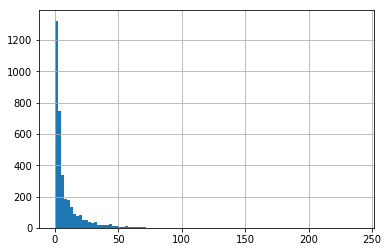

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('luxembourg_counts.csv')

# TODO

X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1].values

print(np.mean(df.iloc[:,-1].values))
plt.hist(df.iloc[:,-1].values,bins=100)
plt.grid()
plt.show()

ausgleich = 0
if 0.8*len(df)%1 != 0:
    ausgleich = 1
split_true = np.ones(int(0.8*len(df))+ausgleich)
split_false = np.zeros(int(0.2*len(df)))
mask = split_true
mask = np.append(mask,split_false)
np.random.shuffle(mask)

XTrain = X[mask == True]
XTest = X[mask == False]
YTrain = X[mask == True]
YTest = X[mask == False]

b) Implement the Mean-Squared-Error function:
$$
MSE = \frac{1}{N_{Test}} \sum_{(x,y)\in D_{Test}} (f(x) - y)^2
$$
and a simple baseline model, which always predicts the mean
$$
f_{base}(x) = \frac{1}{N_{Train}} \sum_{(x,y)\in D_{Train}} y
$$
Test its performance with a $10-$fold cross validation and the test set. 

*Note: The jupyter notebook file already contains the necessary template to integrate your own classifier into `sklearn`*

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class BaselineModel(BaseEstimator, RegressorMixin):
    def __init__(self):
        #We do not have any parameters
        pass
    
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit. Since we will do regression, this is not necessary
        # self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y

        # The actual classifier's fit method
        # TODO

        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X)
        
        # actual predict method
        # TODO
        
        return 0 # return prediction here

In [ ]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def mse(Y,YPredicted):
    # TODO


my_scorer = make_scorer(mse)

xvalScores = []

meanModel = BaselineModel();
scores = cross_val_score(meanModel, XTrain, YTrain, cv = 10, scoring=my_scorer) 
score = np.mean(scores)

meanModel = BaselineModel();
meanModel.fit(XTrain,YTrain)
print("MSE training = ", score)    
print("MSE test = ", mse(YTest, meanModel.predict(XTest)))  

c) Traffic counts have a large variance, which makes the results difficult to interpret. The Standardized Mean Squared Error
$$
SMSE = \frac{1}{N_{Test}\cdot var( D_{Test})} \sum_{(x,y)\in D_{Test}} (f(x) - y)^2
$$
standardized the MSE by also taking into account the variance $var( D_{Test})$ of the lables in the test data. Implement the SMSE and use it to rate the baseline model. What happens and why?

In [ ]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def smse(Y,YPred):
    # TODO

my_scorer = make_scorer(smse)

xvalScores = []

meanModel = BaselineModel();
scores = cross_val_score(meanModel, XTrain, YTrain, cv = 10, scoring=my_scorer) 
score = np.mean(scores)

meanModel = BaselineModel();
meanModel.fit(XTrain,YTrain)
print("MSE training = ", score)    
print("MSE test = ", mse(YTest, meanModel.predict(XTest)))     

d) Implement the K-Nearest-Neigbour algorithm and try different $K\in\{1,\dots,20\}$. What is the best configuration and what is its performance?

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class MyKNN(BaseEstimator, RegressorMixin):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit. Since we will do regression, this is not necessary
        #self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y

        # The actual classifier's fit method
        # TODO

        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X)

        # actual predict method
        # TODO
        return 0 # return prediction here

In [ ]:
# TODO: Validating on parameters and chosing best.